## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data = pd.read_csv('sales-of-shampoo-over-a-three-year.csv')
df = data.copy()
data.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
df.columns = ['Month','Sales']
df.head(2)

,Month,Sales
0,1-01,266.0
1,1-02,145.9


In [5]:
data = pd.read_csv('sales-of-shampoo-over-a-three-year.csv', parse_dates=True,index_col=[0], squeeze=True)
data.tail()

Month
3-09                                         682.0
3-10                                         475.3
3-11                                         581.3
3-12                                         646.9
Sales of shampoo over a three year period      NaN
Name: Sales of shampoo over a three year period, dtype: float64

In [7]:
print(type(data))
data.head(2)

<class 'pandas.core.series.Series'>


Month
1-01    266.0
1-02    145.9
Name: Sales of shampoo over a three year period, dtype: float64

In [8]:
data.drop(labels=['Sales of shampoo over a three year period'],inplace=True)

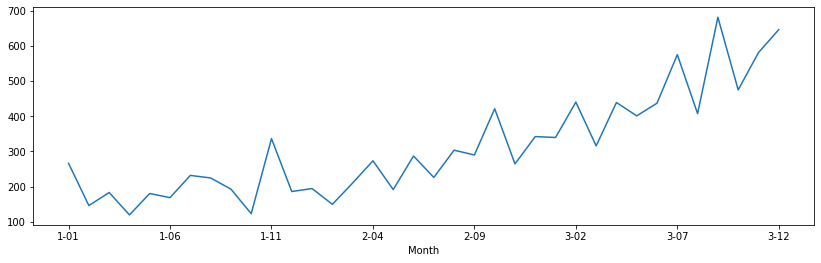

In [9]:
plt.figure(figsize=(14,4))
data.plot()
plt.show()

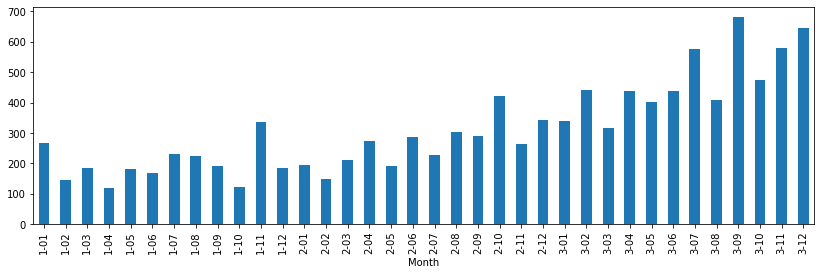

In [10]:
plt.figure(figsize=(14,4))
data.plot(kind='bar')
plt.show()

In [11]:
data.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [54]:
moving_average = data.rolling(window=10).mean()
moving_std = data.rolling(window=10).std()

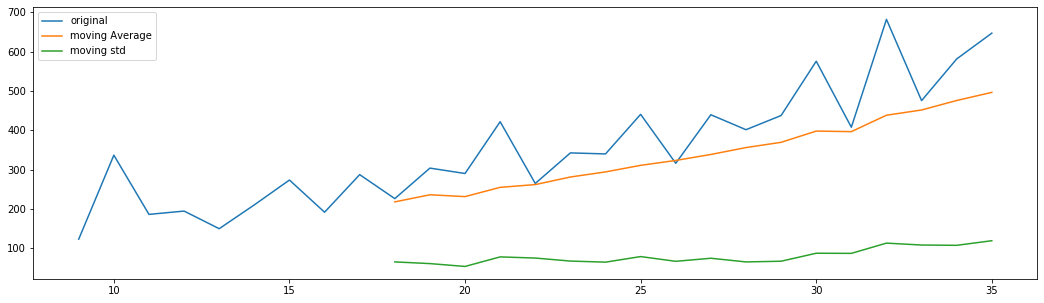

In [55]:
plt.figure(figsize=(18,5))
plt.plot(data,label='original')
plt.plot(moving_average,label='moving Average')
plt.plot(moving_std,label='moving std')
plt.legend(loc='best')
plt.show()

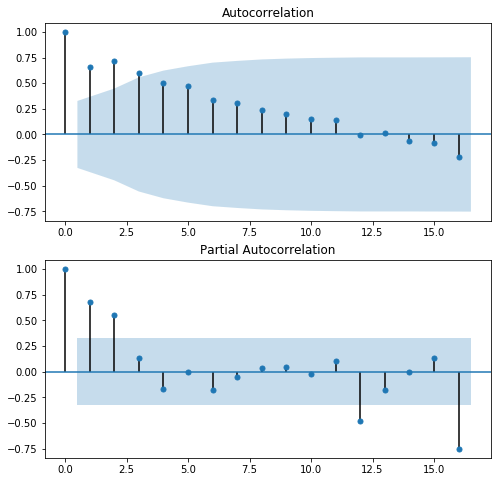

In [14]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data,ax=ax2)

* From the above "acf" Graph we get q = 3
* From "pacf" graph we get p = 3
* And differencive-term d is like 1.

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
data_forecasting = data - data.shift(1)

In [17]:
data_forecasting.dropna(inplace=True)

Showing noise


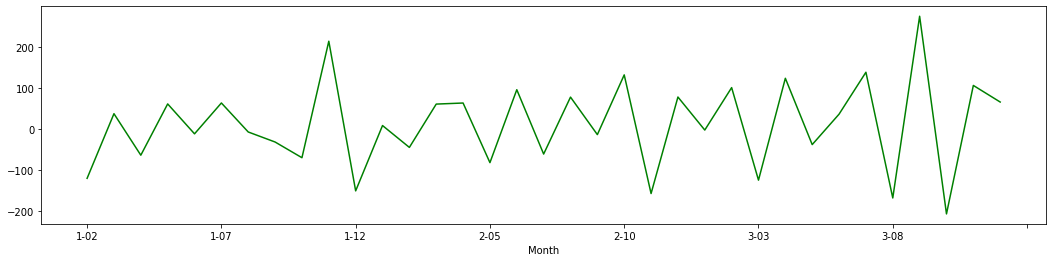

In [18]:
print('Showing noise')
data_forecasting.plot(figsize=(18,4),color='g')
plt.show()

In [19]:
train_data=data[0:26]
test_data=data[26:]

In [32]:
p=3
d=1
q=3

## ARIMAX MODEL

In [33]:
arima= ARIMA(train_data,order=(p,d,q))
model=arima.fit()   

In [34]:
pred = model.forecast(steps=len(test_data))[0]
error = np.sqrt(mean_squared_error(test_data,pred))

In [35]:
error

125.69875213226314

In [36]:
fitval = model.fittedvalues

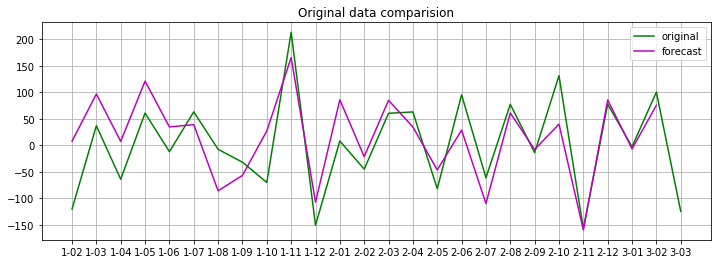

In [38]:
fig = plt.figure(figsize=(12,4))
plt.plot(data_forecasting[:26],color='g',label='original')
plt.plot(fitval,color='m',label='forecast')
plt.title('Original data comparision')
plt.legend()
plt.grid()
plt.show()

In [26]:
pred= model.forecast(steps=len(test_data))[0]

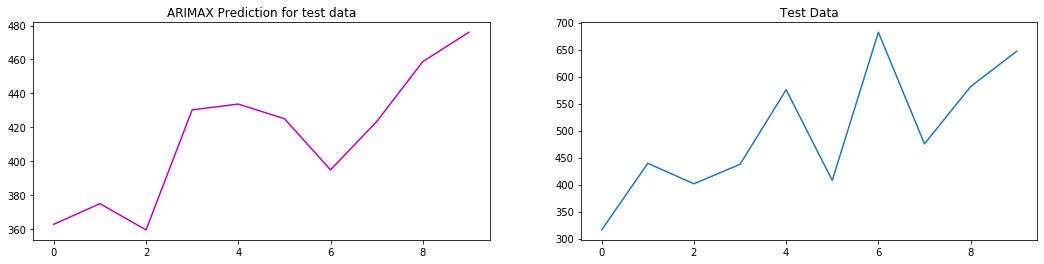

In [40]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(18,4))
ax1.plot(np.arange(len(pred)),pred,color='m')
ax1.set_title('ARIMAX Prediction for test data')
ax2.plot(np.arange(len(test_data)),test_data)
ax2.set_title('Test Data')
plt.show()

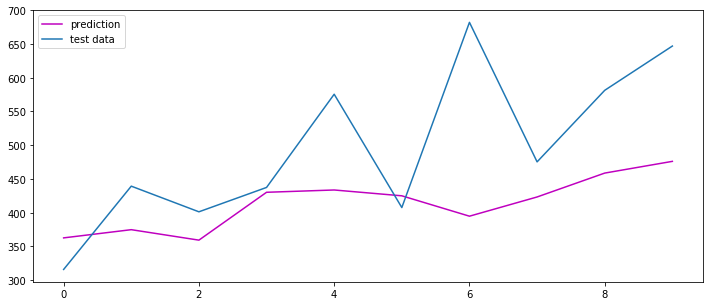

In [43]:
fig = plt.figure(figsize=(12,5))
plt.plot(np.arange(len(pred)),pred,color='m',label='prediction')
plt.plot(np.arange(len(test_data)),test_data,label='test data')
plt.legend()
plt.show()

## SARIMAX TUNNING

In [27]:
#!pip install pmdarima

In [61]:
from pmdarima.arima import ADFTest,auto_arima
step_wise=auto_arima(train_data,start_p=1, start_q=1, max_p=4, max_q=4, d=1, max_d=4,trace=True,
                     suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=285.932, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=298.933, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=287.486, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=297.089, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=287.797, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=285.817, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=288.278, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.872 seconds


In [62]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -138.908
Date:                Sun, 31 Jan 2021   AIC                            285.817
Time:                        22:07:19   BIC                            290.692
Sample:                             0   HQIC                           287.169
                                 - 26                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.0713      3.922      2.058      0.040       0.383      15.759
ma.L1         -1.1161      0.250     -4.473      0.000      -1.605      -0.627
ma.L2          0.3890      0.302      1.290      0.197      -0.202       0.980
sigma2      3724.4933   1311.224      2.840      0.005    1154.542    6294.445
===================================================================================
Ljung-Box (Q):                       27.26   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.29   Prob(JB):                         0.78
Heteroskedasticity (H):               1.26   Skew:                             0.32
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### ARIMAX like model without seasonal values

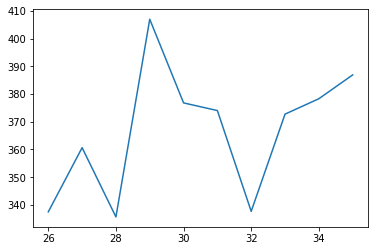

In [263]:
modelsx= SARIMAX(train_data,order=(3,1,3))
results= modelsx.fit()
forecast= results.forecast(steps=len(test_data))
plt.plot(forecast)
plt.show()

### MAKING SARIMAX WITH SEASONAL

In [284]:
shampoo = pd.read_csv('sales-of-shampoo-over-a-three-year.csv')
shampoo.tail()

,Month,Sales of shampoo over a three year period
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9
36,Sales of shampoo over a three year period,NaN


In [285]:
shampoo = shampoo.drop(36)

In [286]:
shampoo.describe()

,Sales of shampoo over a three year period
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [287]:
moving_av = shampoo.rolling(window=10).mean() 

In [288]:
shampoo['ma'] = moving_av
shampoo = shampoo.dropna()

In [289]:
shampoo.columns = ['Month','Sales','ma']
shampoo.head()

,Month,Sales,ma
9,1-10,122.9,183.51
10,1-11,336.5,190.56
11,1-12,185.9,194.56
12,2-01,194.3,195.68
13,2-02,149.5,198.70


### best values from auto ARIMA (0,1,2)(0,0,0)[0]

In [291]:
data = shampoo['Sales']
other_data = shampoo['ma']
order = (0, 1, 2)
seasonal_order = (0, 0, 0, 0)
sxmodel = SARIMAX(data, order = order, exog = other_data,seasonal_order = seasonal_order)

In [292]:
res = sxmodel.fit(disp=False)

In [293]:
print(res.summary().tables[0])

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   27
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -143.389
Date:                Sun, 31 Jan 2021   AIC                            294.778
Time:                        23:31:35   BIC                            299.811
Sample:                             0   HQIC                           296.227
                                 - 27                                         
Covariance Type:                  opg                                         


In [294]:
print(res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma             1.3570      0.132     10.277      0.000       1.098       1.616
ma.L1         -1.4638     25.966     -0.056      0.955     -52.357      49.429
ma.L2          0.4646     11.926      0.039      0.969     -22.910      23.839
sigma2      3019.5648   7.87e+04      0.038      0.969   -1.51e+05    1.57e+05


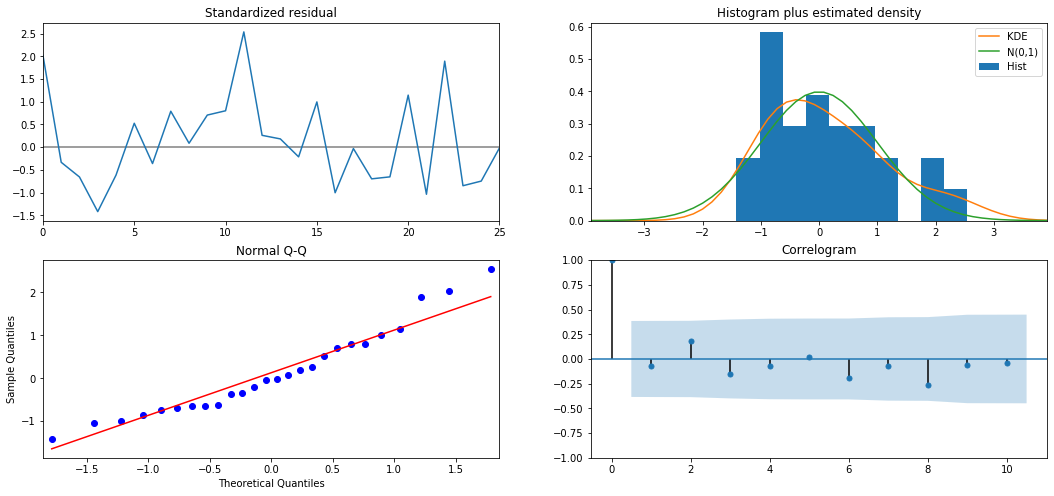

In [295]:
res.plot_diagnostics(figsize=(18, 8))
plt.show()

In [296]:
predic = res.get_prediction(start=1-10,exog=other_data)
pred_ci = predic.conf_int()

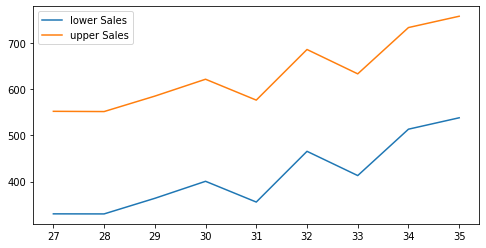

In [297]:
pred_ci.plot(figsize=(8,4))
plt.show()

In [298]:
preda = predic.predicted_mean

In [299]:
index = preda.index
smp = shampoo['Sales']
test = smp[1-10:]
test.index = index

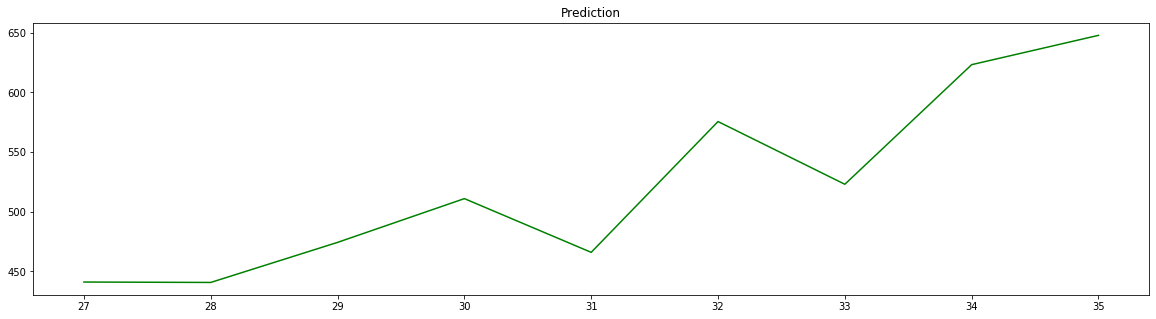

In [300]:
f=plt.figure(figsize=(20,5))
plt.plot(preda,color='g')
plt.title('Prediction')
plt.show()

In [301]:
data = data.reset_index(drop=True)

In [302]:
total = pd.concat([data,preda],0)

In [303]:
pred = total[27:]

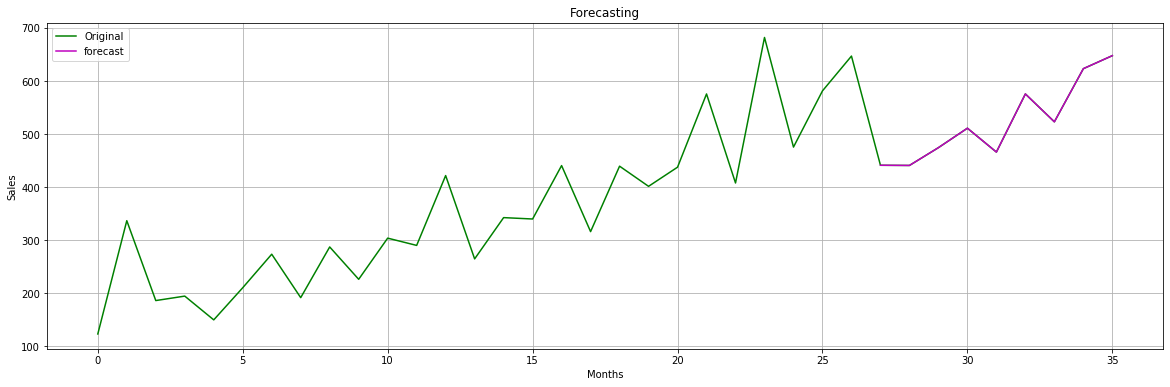

In [304]:
f=plt.figure(figsize=(20,6))
plt.plot(total,color='g',label='Original')
plt.plot(np.arange(27,36),pred,color='m',label='forecast')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.title('Forecasting')
plt.grid()
plt.show()

In [ ]:
2